### **load libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### **load Data**

In [2]:
train = pd.read_csv(r"/content/train_data.txt",sep=':::',names=['title', 'genre', 'description'],engine="python")
test = pd.read_csv(r"/content/test_data.txt",sep=':::',names=['id', 'title', 'description'],engine="python")

In [3]:
train

,title,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [4]:
test

,id,title,description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
50726,50727,Neither Memory Nor Magic (2007),Twenty-two decayed bodies were found sprawled...
50727,50728,Independent America: The Two-Lane Search for ...,Independent America: The Two Lane Search for ...
50728,50729,The Conflict (1916/I),Two women crave the love of the same man; one...
50729,50730,Lekzin (2016),Seven year old Lekzin is brought to a bridge ...


### **Data exploration**

In [5]:
print(train.shape)
print(test.shape)

(54214, 3)
(50731, 3)


In [6]:
train.head()

,title,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [7]:
train.tail()

,title,genre,description
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...
54214,Nature's Fury: Storm of the Century (2006),history,"On Labor Day Weekend, 1935, the most intense ..."


In [8]:
train.sample()

,title,genre,description
43712,The Point After (????),drama,"A Private investigator, Melissa, comes to the..."


In [9]:
train.describe()

,title,genre,description
count,54214,54214,54214
unique,54214,27,54086
top,Nature's Fury: Storm of the Century (2006),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        54214 non-null  object
 1   genre        54214 non-null  object
 2   description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [11]:
train.isnull()

,title,genre,description
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
...,...,...,...
54210,False,False,False
54211,False,False,False
54212,False,False,False
54213,False,False,False


In [12]:
train.isnull().sum()

,0
title,0
genre,0
description,0


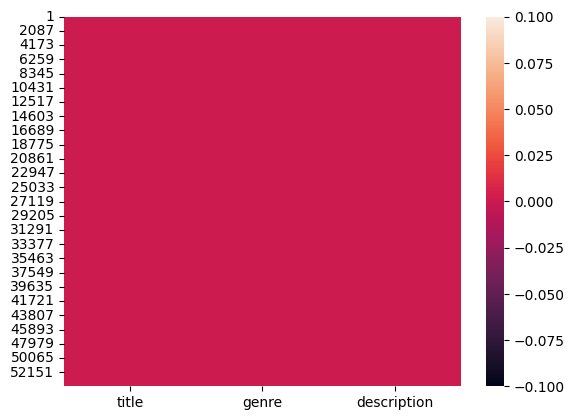

In [13]:
sns.heatmap(train.isnull())
plt.show()

### **Data Cleaning**

In [14]:
train = train.drop(["title"],axis = 1)

In [15]:
train

,genre,description
1,drama,Listening in to a conversation between his do...
2,thriller,A brother and sister with a past incestuous r...
3,adult,As the bus empties the students for their fie...
4,drama,To help their unemployed father make ends mee...
5,drama,The film's title refers not only to the un-re...
...,...,...
54210,comedy,This short-lived NBC live sitcom centered on ...
54211,horror,The NEXT Generation of EXPLOITATION. The sist...
54212,documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,comedy,Walter and Vivian live in the country and hav...


In [16]:
test = test.drop(["title"],axis = 1 )
test

,id,description
0,1,"L.R. Brane loves his life - his car, his apar..."
1,2,"Spain, March 1964: Quico is a very naughty ch..."
2,3,One year in the life of Albin and his family ...
3,4,"His father has died, he hasn't spoken with hi..."
4,5,Before he was known internationally as a mart...
...,...,...
50726,50727,Twenty-two decayed bodies were found sprawled...
50727,50728,Independent America: The Two Lane Search for ...
50728,50729,Two women crave the love of the same man; one...
50729,50730,Seven year old Lekzin is brought to a bridge ...


In [17]:
train.duplicated().sum()

np.int64(109)

In [18]:
train.drop_duplicates(inplace=True)

In [19]:
train.duplicated().sum()

np.int64(0)

In [20]:
test.drop_duplicates(inplace=True)

In [21]:
test.duplicated().sum()

np.int64(0)

### **data analysis**

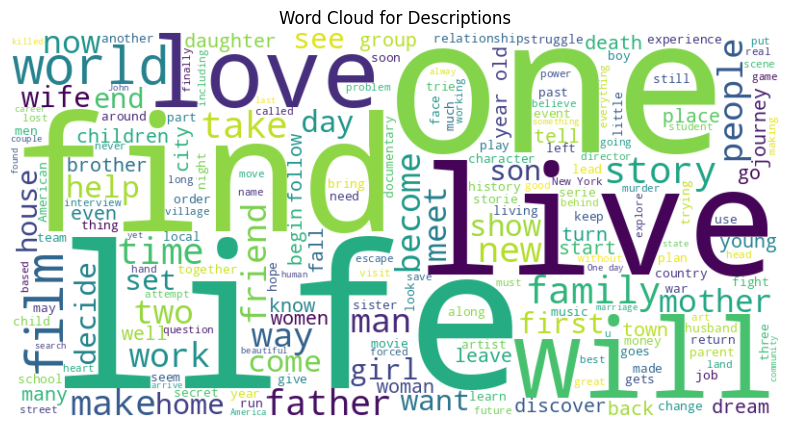

In [22]:
descriptions = " ".join(train['description'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(descriptions)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Descriptions")
plt.show()

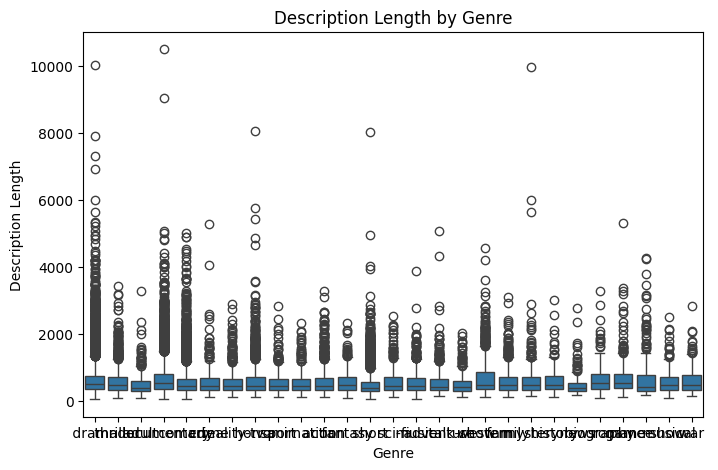

In [23]:
train['description_length'] = train['description'].apply(len)

plt.figure(figsize=(8, 5))
sns.boxplot(x='genre', y='description_length', data=train)
plt.title("Description Length by Genre")
plt.xlabel("Genre")
plt.ylabel("Description Length")
plt.show()

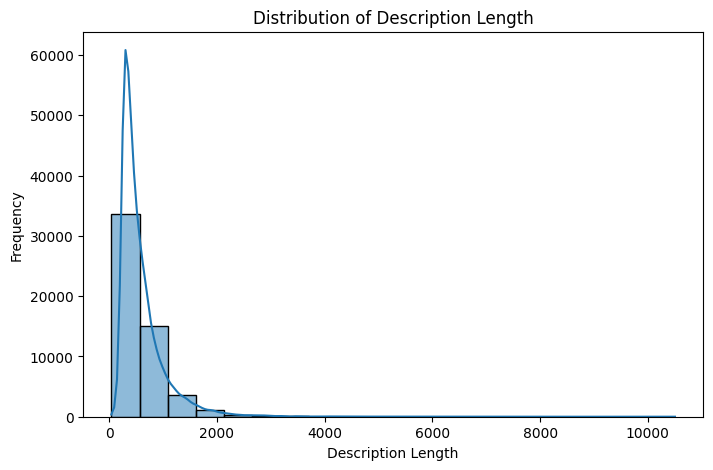

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(train['description_length'], bins=20, kde=True)
plt.title("Distribution of Description Length")
plt.xlabel("Description Length")
plt.ylabel("Frequency")
plt.show()

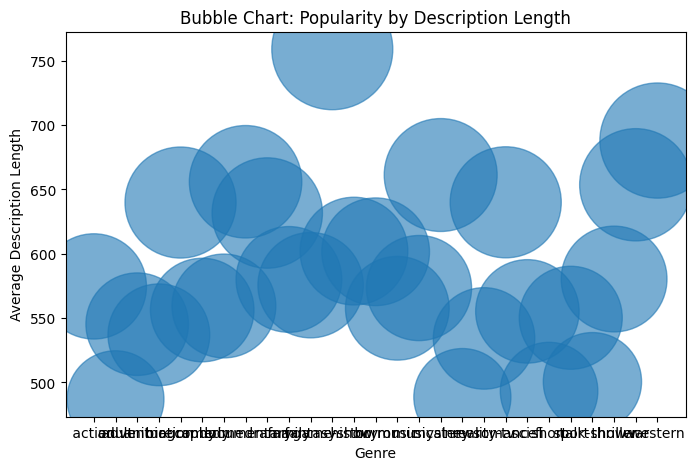

In [25]:
genre_avg_length = train.groupby('genre')['description_length'].mean()

plt.figure(figsize=(8, 5))
plt.scatter(genre_avg_length.index, genre_avg_length.values, s=genre_avg_length.values * 10, alpha=0.6)
plt.title("Bubble Chart: Popularity by Description Length")
plt.xlabel("Genre")
plt.ylabel("Average Description Length")
plt.show()

In [26]:
train.genre.value_counts()

,count
genre,
drama,13578
documentary,13079
comedy,7432
short,5062
horror,2204
thriller,1591
action,1313
western,1032
reality-tv,883


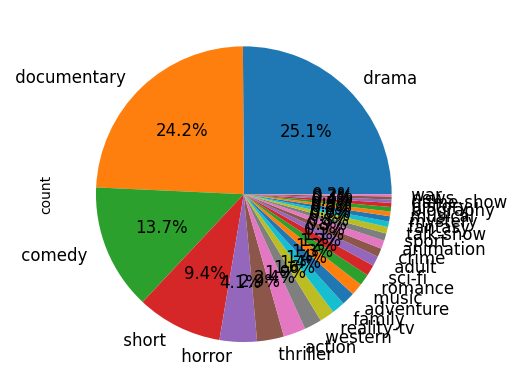

In [27]:
train.genre.value_counts().plot.pie(autopct="%0.1f%%", textprops={'fontsize': 12})
plt.show()

### **Create model and cleaning**

In [28]:
print(train.columns)
print(test.columns)

Index(['genre', 'description', 'description_length'], dtype='object')
Index(['id', 'description'], dtype='object')


In [29]:
train = train.drop(["description_length"],axis = 1)
train

,genre,description
1,drama,Listening in to a conversation between his do...
2,thriller,A brother and sister with a past incestuous r...
3,adult,As the bus empties the students for their fie...
4,drama,To help their unemployed father make ends mee...
5,drama,The film's title refers not only to the un-re...
...,...,...
54210,comedy,This short-lived NBC live sitcom centered on ...
54211,horror,The NEXT Generation of EXPLOITATION. The sist...
54212,documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,comedy,Walter and Vivian live in the country and hav...


In [30]:
def clean_text(train_data, text_column):

    train_data[text_column] = train_data[text_column].str.lower()


    train_data[text_column] = train_data[text_column].apply(
        lambda txt: txt.translate(str.maketrans('', '', string.punctuation))
    )


    stop_words = set(stopwords.words('english'))
    train_data[text_column] = train_data[text_column].apply(
        lambda txt: ' '.join(word for word in txt.split() if word not in stop_words)
    )


    word_lemmatizer = WordNetLemmatizer()
    train_data[text_column] = train_data[text_column].apply(
        lambda txt: ' '.join(word_lemmatizer.lemmatize(word) for word in txt.split())
    )


    train_data[text_column] = train_data[text_column].apply(
        lambda txt: txt if txt.strip() != '' else 'empty'
    )

    return train_data


train = clean_text(train, 'description')


train.head()

,genre,description
1,drama,listening conversation doctor parent 10yearold...
2,thriller,brother sister past incestuous relationship cu...
3,adult,bus empty student field trip museum natural hi...
4,drama,help unemployed father make end meet edith twi...
5,drama,film title refers unrecovered body ground zero...


In [31]:
def clean_text(test_data, text_column):

    test_data[text_column] = test_data[text_column].str.lower()


    test_data[text_column] = test_data[text_column].apply(
        lambda txt: txt.translate(str.maketrans('', '', string.punctuation))
    )


    stop_words = set(stopwords.words('english'))
    test_data[text_column] = test_data[text_column].apply(
        lambda txt: ' '.join(word for word in txt.split() if word not in stop_words)
    )


    word_lemmatizer = WordNetLemmatizer()
    test_data[text_column] = test_data[text_column].apply(
        lambda txt: ' '.join(word_lemmatizer.lemmatize(word) for word in txt.split())
    )

    test_data[text_column] = test_data[text_column].apply(
        lambda txt: txt if txt.strip() != '' else 'empty'
    )

    return test_data


test = clean_text(test, 'description')

test.head()

,id,description
0,1,lr brane love life car apartment job especiall...
1,2,spain march 1964 quico naughty child three bel...
2,3,one year life albin family shepherd north tran...
3,4,father died hasnt spoken brother 10 year serio...
4,5,known internationally martial art superstar br...


In [32]:
def balance_data_with_oversampling(dataset, target_column):

    max_samples = dataset[target_column].value_counts().max()

    balanced_dataset = pd.DataFrame()

    def oversample(group):
        return group.sample(n=max_samples, replace=True)

    for category, group in dataset.groupby(target_column):
        balanced_group = oversample(group)
        balanced_dataset = pd.concat([balanced_dataset, balanced_group])


    return balanced_dataset.sample(frac=1).reset_index(drop=True)


balanced_train = balance_data_with_oversampling(train, 'genre')


print(balanced_train['genre'].value_counts())

genre
music           13578
thriller        13578
drama           13578
sci-fi          13578
musical         13578
animation       13578
sport           13578
war             13578
family          13578
history         13578
adult           13578
biography       13578
crime           13578
game-show       13578
news            13578
documentary     13578
adventure       13578
fantasy         13578
horror          13578
action          13578
romance         13578
reality-tv      13578
western         13578
talk-show       13578
short           13578
comedy          13578
mystery         13578
Name: count, dtype: int64


In [33]:
tfidf_vectorizer = TfidfVectorizer()
train = tfidf_vectorizer.fit_transform(balanced_train['description'])
test = tfidf_vectorizer.transform(test['description'])

print(train)
print(test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 17263708 stored elements and shape (366606, 120164)>
  Coords	Values
  (0, 21354)	0.09503527742238592
  (0, 58307)	0.3548619288552725
  (0, 84519)	0.09536292980603697
  (0, 104253)	0.1500033357724203
  (0, 60216)	0.11305734818729551
  (0, 76891)	0.17100009560730528
  (0, 114238)	0.1660892985829516
  (0, 38493)	0.09622494846889823
  (0, 106773)	0.11109436449132393
  (0, 61620)	0.17938570058667813
  (0, 27313)	0.12104768852411538
  (0, 1072)	0.13325911539378374
  (0, 51877)	0.09792177260545384
  (0, 37051)	0.12187816379238006
  (0, 46603)	0.10252348471841173
  (0, 34155)	0.11477619181816723
  (0, 38589)	0.08803102870535216
  (0, 3365)	0.09191794303472724
  (0, 97645)	0.3503739014450471
  (0, 38374)	0.0766640547251632
  (0, 110899)	0.10451566354206515
  (0, 27559)	0.10951596038673966
  (0, 35744)	0.08394167703808234
  (0, 64947)	0.12607459664548826
  (0, 114750)	0.12328372734881
  :	:
  (366605, 2779)	0.09197076587028459
  (366

In [34]:
x = train
y = balanced_train['genre']

In [36]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=22,
                                    shuffle = True)

In [37]:
model1 = MultinomialNB()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9165320996814036


In [40]:
model2 = MultinomialNB()
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9165320996814036


In [ ]:
model3 = LogisticRegression()
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)

In [48]:
confusion_matrix(y_test,y_pred)

array([[3314,    2,    3,    3,    0,    6,    0,    0,    4,    7,    6,
           0,    4,    2,    0,    0,    0,    0,    0,    3,    9,    6,
           9,    0,    3,    4,    0],
       [   0, 3332,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,    0, 3481,    0,    0,    0,    0,    0,    0,    0,    2,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    7,
           0,    0,    0,    0,    0],
       [   0,    0,    0, 3375,    0,    0,    0,    0,    0,    0,    8,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 3411,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [  48,   13,    9,   14,    1, 2632,   19,   53,  258,   4

In [49]:
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

      action        0.93      0.98      0.96      3385
       adult        0.98      1.00      0.99      3332
   adventure        0.98      1.00      0.99      3490
   animation        0.98      1.00      0.99      3383
   biography        0.99      1.00      1.00      3411
      comedy        0.83      0.76      0.79      3484
       crime        0.97      1.00      0.98      3280
 documentary        0.85      0.76      0.80      3397
       drama        0.76      0.64      0.69      3374
      family        0.96      1.00      0.98      3409
     fantasy        0.99      1.00      0.99      3369
   game-show        1.00      1.00      1.00      3456
     history        0.99      1.00      0.99      3461
      horror        0.94      0.95      0.94      3426
       music        0.97      1.00      0.98      3398
     musical        0.99      1.00      0.99      3401
     mystery        0.99      1.00      1.00      3388
        n

In [46]:
print(model3.score(X_test,y_test))
print(model3.score(X_train,y_train))

0.9519268537511456
0.970849669399245
